In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
type(soup)

# Get the title
title = soup.title
print(title)

# Print out the text
text = soup.get_text()
# print(soup.text)

# all_links = soup.find_all("a")
# for link in all_links:
#     print(link.get("href"))

# # Print the first 10 rows for sanity check
# rows = soup.find_all('tr')
# print(rows[:10])


<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [13]:
rows = soup.find_all('tr')

for row in rows:
    row_td = row.find_all('td')
    str_cells = str(row_td)
    cleantext = BeautifulSoup(str_cells, "lxml").get_text()
#     print(cleantext)


In [14]:
import re

list_rows = []
for row in rows[1:]:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    clean2 = clean2.replace('\n', ' ').replace('\r', '')
    clean2 = (re.sub('\s\s+', ' ', clean2))
    list_rows.append(clean2)
print(clean2)
type(clean2)


[577, 443, LIBBY B MITCHELL , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


str

In [15]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON , M, TIGARD, OR, 36:21, ..."
5,"[2, 573, NATHAN A SUSTERSIC , M, PORTLAND, OR,..."
6,"[3, 687, FRANCISCO MAYA , M, PORTLAND, OR, 37:..."
7,"[4, 623, PAUL MORROW , M, BEAVERTON, OR, 38:34..."
8,"[5, 569, DEREK G OSBORNE , M, HILLSBORO, OR, 3..."
9,"[6, 642, JONATHON TRAN , M, PORTLAND, OR, 39:4..."


In [16]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[Finishers:,577],None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ]
9,[6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,39:55,]


In [17]:
df1[0] = df1[0].str.strip('[')
df1.head(10)


,0,1,2,3,4,5,6,7,8,9
0,Finishers:,577],None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ]
9,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,39:55,]


In [18]:
col_labels = soup.find_all('th')

In [19]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']


In [20]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [21]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


In [22]:
frames = [df3, df1]

In [23]:
df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ]


In [24]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None


In [25]:
df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 580
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      582 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 50.0+ KB


(582, 10)

In [26]:
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 580
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      578 non-null    object
 1    Bib        578 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 49.7+ KB


(578, 10)

In [27]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ]


In [28]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F ]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F ]


In [29]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F


In [45]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    time = i.split(':')
    h = 0
    m = 0
    s =  0
    if len(time) == 3:
        h = int(time[0])
        m = int(time[1])
        s = int(time[2])
    elif len(time) == 2:
        m = int(time[0])
        s = int(time[1])
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)


In [48]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team,Runner_mins
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F,36.700000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,,38.566667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F,39.350000


In [49]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


([<matplotlib.axis.XTick at 0x24800864640>], [Text(1, 0, 'Runners')])

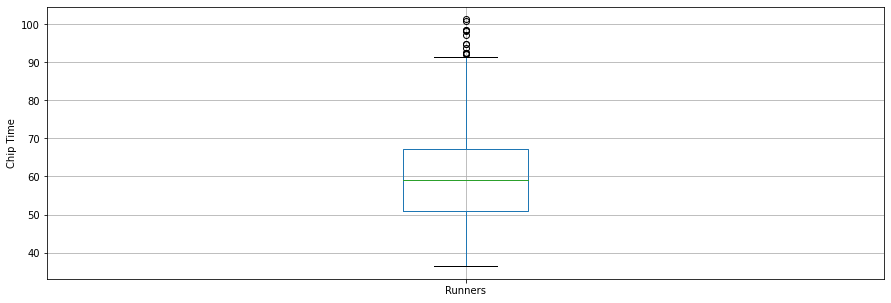

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
 
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


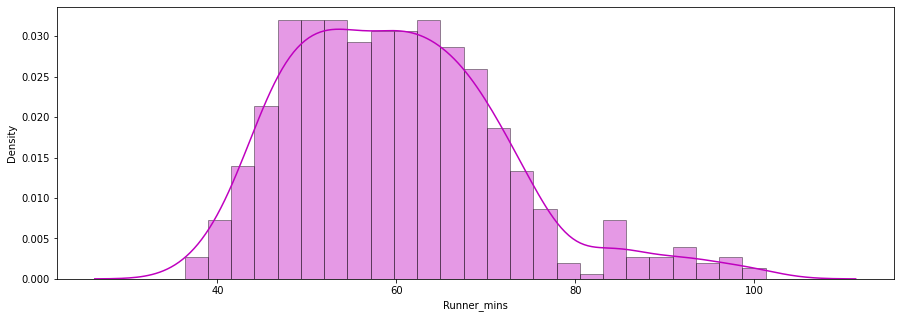

In [53]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


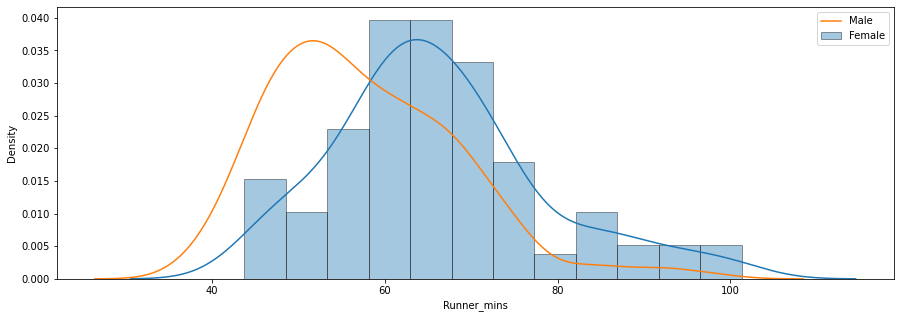

In [54]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [55]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

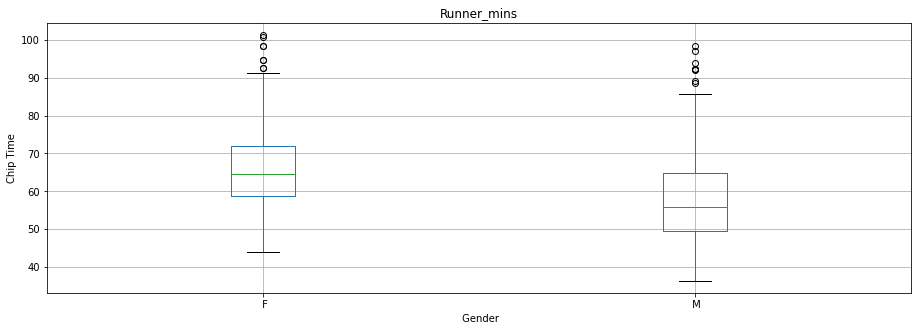

In [56]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")